In [1]:
from os import getcwd
from os.path import join, abspath

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from src.data.load_dataset import load_V1_whitenoise, load_V1_DHT, load_V1_natural_images, load_V1_Ringach, load_sensilla_sta 
from src.models.weights import V1_weights, sensilla_weights

In [2]:
## set the matplotlib params
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['xtick.minor.size'] = 0
mpl.rcParams['ytick.minor.size'] = 0
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['axes.linewidth'] = 2

In [27]:
data_dir = abspath(join(getcwd(), '../../'))
save_dir = data_dir + '/reports/figures/paper_figs/supp_figs/receptive_fields/'

# rf params
size = {'wn':1.87, 'nat_img':5.40, 'dht':10.46,  'ringach':2.41}
spatial_freq = {'wn':0.7, 'nat_img':1.17, 'dht':1.2,  'ringach':0.95}
lowcut, highcut, gamma = 75, 200, 0.01217

In [29]:
# plot receptive fields from white noise
rf_data, snr, dim = load_V1_whitenoise(centered=False)
rf = rf_data[snr > 0.4]
rf_norm = (rf - np.mean(rf, axis=1).reshape(-1, 1)) / np.std(rf, axis=1).reshape(-1, 1)
num_cells = len(rf)

s, f = size['wn'], spatial_freq['wn']
W = V1_weights(num_cells, dim, s, f, center=None, scale=1, seed=22)

index = np.random.randint(0, num_cells, 40)
fig = plt.figure(figsize=(14, 2.5))
for i, idx in enumerate(index):
    ax = fig.add_subplot(4, 10, i + 1)
    plt.imshow(rf_norm[idx].reshape(dim), cmap='PuOr')
    plt.clim(-6, 6)
    plt.axis('off')
plt.savefig(save_dir + 'rf_v1_wn_data.pdf', dpi=300, transparent=True,
           bbox_inches='tight', pad_inches=0.01)
plt.close()
    
fig = plt.figure(figsize=(14, 2.5))
for i, idx in enumerate(index):
    ax = fig.add_subplot(4, 10, i + 1)
    plt.imshow(W[idx].reshape(dim), cmap='PuOr')
    plt.clim(-6, 6)
    plt.axis('off')
plt.savefig(save_dir + 'rf_v1_wn_generated.pdf', dpi=300, transparent=True,
           bbox_inches='tight', pad_inches=0.01)
plt.close()

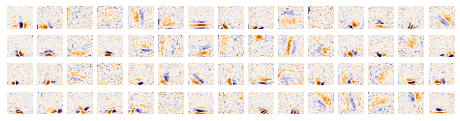

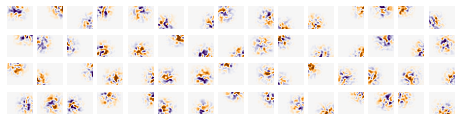

In [64]:
# plot receptive fields from natural images
rf_data, snr, dim = load_V1_natural_images(centered=False)
rf = np.mean(rf_data, axis=0)
rf = rf[snr > 0.4]
rf_norm = (rf - np.mean(rf, axis=1).reshape(-1, 1)) / np.std(rf, axis=1).reshape(-1, 1)
num_cells = len(rf)

s, f = size['nat_img'], spatial_freq['nat_img']
W = V1_weights(num_cells, dim, s, f, center = None, scale=1, seed=0) 

index = np.random.randint(0, num_cells, 60)
fig = plt.figure(figsize=(8, 2))
for i, idx in enumerate(index):
    ax = fig.add_subplot(4, 15, i + 1)
    plt.imshow(rf_norm[i].reshape(dim), cmap='PuOr')
    plt.clim(-4, 4)
    plt.axis('off')
plt.savefig(save_dir + 'rf_v1_nat_img_data.pdf', dpi=300, transparent=True,
           bbox_inches='tight', pad_inches=0.01)
# plt.close()
    
fig = plt.figure(figsize=(8, 2))
for i, idx in enumerate(index):
    ax = fig.add_subplot(4, 15, i + 1)
    plt.imshow(W[i].reshape(dim), cmap='PuOr')
    plt.clim(-4, 4)
    plt.axis('off')
# plt.tight_layout()
plt.savefig(save_dir + 'rf_v1_nat_img_generated.pdf', dpi=300, transparent=True,
           bbox_inches='tight', pad_inches=0.01)
# plt.close()

In [32]:
# plot receptive fields from DHT data
rf_data, snr, dim = load_V1_DHT(centered=False)
rf = rf_data[snr > 1]
num_cells = len(rf)
rf_norm = (rf - np.mean(rf, axis=1).reshape(-1, 1)) / np.std(rf, axis=1).reshape(-1, 1)

s, f = size['dht'], spatial_freq['dht']
W = V1_weights(num_cells, dim, s, f, center = None, scale=1, seed=0)


index = np.random.randint(0, num_cells, 40)
fig = plt.figure(figsize=(14, 3))
for i, idx in enumerate(index):
    ax = fig.add_subplot(4, 10, i + 1)
    plt.imshow(rf_norm[i].reshape(dim), cmap='PuOr')
    plt.clim(-4, 4)
    plt.axis('off')
plt.savefig(save_dir + 'rf_v1_dht_data.pdf', dpi=300, transparent=True,
           bbox_inches='tight', pad_inches=0.01)
plt.close()
    
fig = plt.figure(figsize=(14, 3))
for i, idx in enumerate(index):
    ax = fig.add_subplot(4, 10, i + 1)
    plt.imshow(W[i].reshape(dim), cmap='PuOr')
    plt.clim(-4, 4)
    plt.axis('off')
plt.savefig(save_dir + 'rf_v1_dht_generated.pdf', dpi=300, transparent=True,
           bbox_inches='tight', pad_inches=0.01)
plt.close()

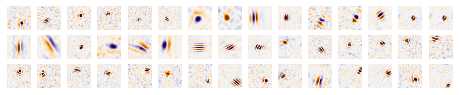

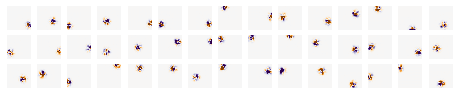

In [69]:
# plot receptive fields from Ringach
rf, dim = load_V1_Ringach(centered=False)
num_cells = len(rf)
rf_norm = (rf - np.mean(rf, axis=1).reshape(-1, 1)) / np.std(rf, axis=1).reshape(-1, 1)

s, f = size['ringach'], spatial_freq['ringach']
W = V1_weights(num_cells, dim, s, f, center = None, scale=1, seed=22) 

index = np.random.randint(0, num_cells, 45)
fig = plt.figure(figsize=(8, 1.5))
for i, idx in enumerate(index):
    ax = fig.add_subplot(3, 15, i + 1)
    plt.imshow(rf_norm[i].reshape(dim), cmap='PuOr')
    plt.clim(-4, 4)
    plt.axis('off')
plt.savefig(save_dir + 'rf_v1_ringach_data.pdf', dpi=300, transparent=True,
           bbox_inches='tight', pad_inches=0.01)
# plt.close()
    
fig = plt.figure(figsize=(8, 1.5))
for i, idx in enumerate(index):
    ax = fig.add_subplot(3, 15, i + 1)
    plt.imshow(W[i].reshape(dim), cmap='PuOr')
    plt.clim(-4, 4)
    plt.axis('off')
plt.savefig(save_dir + 'rf_v1_ringach_generated.pdf', dpi=300, transparent=True,
           bbox_inches='tight', pad_inches=0.01)
# plt.close()

In [35]:
# plot receptive fields from sensilla
sta, samp_frequency, duration = load_sensilla_sta()
num_cells, dim = sta.shape

W = sensilla_weights(num_cells, dim, samp_frequency, duration, lowcut, highcut, gamma, seed=20)

index = np.random.randint(0, num_cells, 40)
fig = plt.figure(figsize=(14, 3))
for i, idx in enumerate(index):
    ax = fig.add_subplot(4, 10, i + 1)
    plt.plot(sta[i], lw=2, c="#047495")
    plt.axis('off')
plt.savefig(save_dir + 'sta_sensilla_data.pdf', dpi=300, transparent=True,
           bbox_inches='tight', pad_inches=0.01)
plt.close()
    
    
fig = plt.figure(figsize=(14, 3))
for i, idx in enumerate(index):
    ax = fig.add_subplot(4, 10, i + 1)
    plt.plot(W[i], lw=2, c='#e50000')
    plt.axis('off')
plt.savefig(save_dir + 'sta_sensilla_generated.pdf', dpi=300, transparent=True,
           bbox_inches='tight', pad_inches=0.01)
plt.close()

In [70]:
1571 / 268

5.861940298507463